## Line-depth dependence of convective blueshift

In [1]:
#Libraries
from astropy.io import fits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import numpy.polynomial.polynomial as poly
from numpy.polynomial import Polynomial
import scipy.constants as const

#Configuration for the font and style in the graphics
params = {
        'font.family': 'serif',
        'font.serif': ['STIXGeneral', 'Times New Roman'],
        'font.size': 16,
        'axes.labelsize': 16,
        'axes.titlesize': 18,
        'legend.fontsize': 16,
        'xtick.labelsize': 16,
        'ytick.labelsize': 16,
        'mathtext.fontset': 'stix',
        'text.usetex': False,
        'figure.figsize': (6.4, 4.8),
        'savefig.format': 'pdf',
        'savefig.bbox': 'tight'
    }
    
plt.rcParams.update(params)

In [2]:
#Lines from the excel files
VIS_data = pd.read_excel(r"C:\Users\clauw\Documents\Programming\Final-Project\Project\IAG Solar Flux Atlas\Final data\Values VIS.xlsx")
NIR_data = pd.read_excel(r"C:\Users\clauw\Documents\Programming\Final-Project\Project\IAG Solar Flux Atlas\Final data\Values NIR.xlsx")
SPA_data = pd.read_excel(r"C:\Users\clauw\Documents\Programming\Final-Project\Project\IAG Spatially Resolved Atlas\Data\Values_SPA.xlsx")
ALL_data = pd.read_excel(r"C:\Users\clauw\Documents\Programming\Final-Project\Project\IAG Solar Flux Atlas\Final data\Values ALL.xlsx")
 
#colors for the plot
colors_fit = ['purple','blue','cyan','green','yellow','orange','red','brown','darkred']

### Granulation patterns

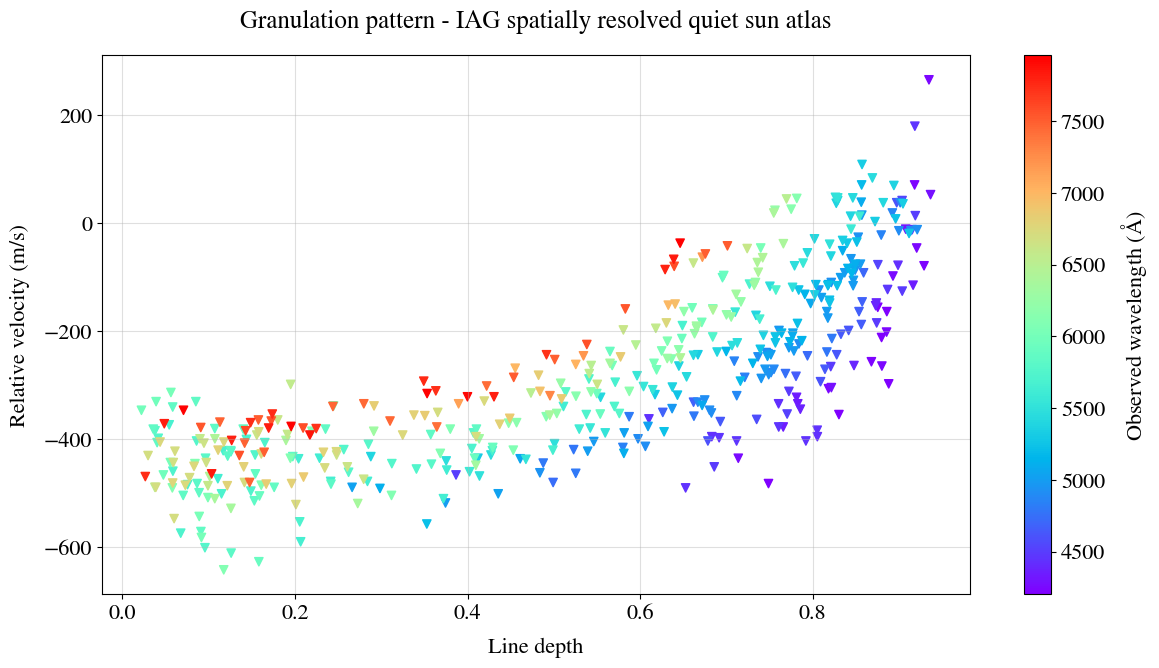

In [ ]:
fig1, ax = plt.subplots(1,1,figsize=(14,7))

scatter = ax.scatter(SPA_data['Line Depth'],SPA_data['Velocity'],c=SPA_data["Observed wavelength"],cmap='rainbow',lw=1,marker='v')

cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label(r'Observed wavelength $(\mathrm{\AA})$',labelpad=10)

ax.set_title('Granulation pattern - IAG spatially resolved quiet sun atlas', pad=20)
ax.set_xlabel(r'Line depth',labelpad=10)
ax.set_ylabel(r'Relative velocity (m/s)',labelpad=10)
ax.grid(alpha=0.4)

# fig1.savefig('GranulationPattern_SPA')

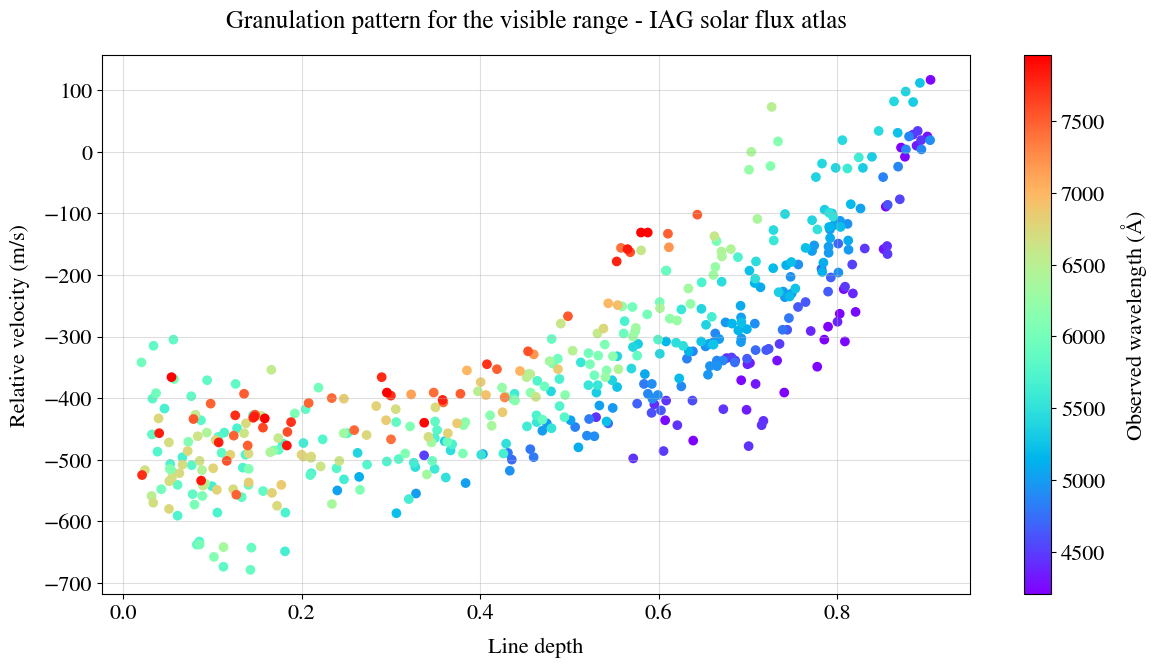

In [ ]:
fig2, ax = plt.subplots(1,1,figsize=(14,7))

scatter = ax.scatter(VIS_data['Line Depth'],VIS_data['Velocity'],c=VIS_data["Observed wavelength"],cmap='rainbow',lw=1,marker='o')

cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label(r'Observed wavelength $(\mathrm{\AA})$',labelpad=10)

ax.set_title('Granulation pattern for the visible range - IAG solar flux atlas', pad=20)
ax.set_xlabel(r'Line depth',labelpad=10)
ax.set_ylabel(r'Relative velocity (m/s)',labelpad=10)
ax.grid(alpha=0.4)

# fig2.savefig('GranulationPattern_VIS')

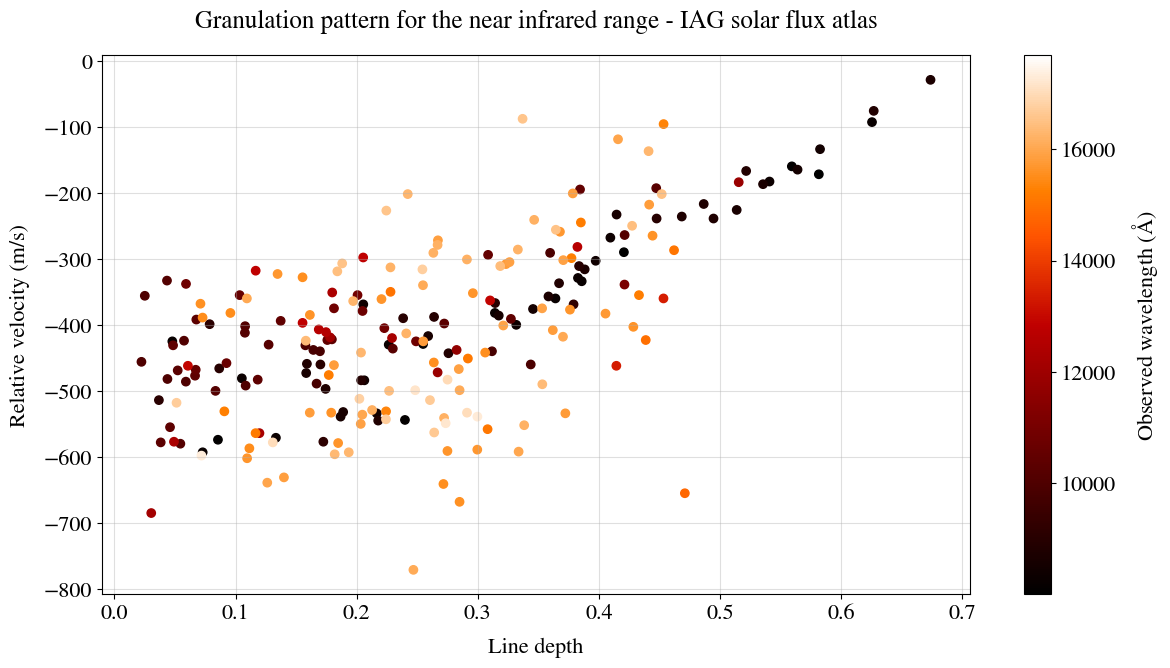

In [ ]:
fig2, ax = plt.subplots(1,1,figsize=(14,7))

scatter = ax.scatter(NIR_data['Line Depth'],NIR_data['Velocity'],c=NIR_data["Observed wavelength"],cmap='gist_heat',lw=1,marker='o')

cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label(r'Observed wavelength $(\mathrm{\AA})$',labelpad=10)

ax.set_title('Granulation pattern for the near infrared range - IAG solar flux atlas', pad=20)
ax.set_xlabel(r'Line depth',labelpad=10)
ax.set_ylabel(r'Relative velocity (m/s)',labelpad=10)
ax.grid(alpha=0.4)

# fig2.savefig('GranulationPattern_NIR')

## Characterization

### Ellwarth standard curve (just for the spatially resolved)

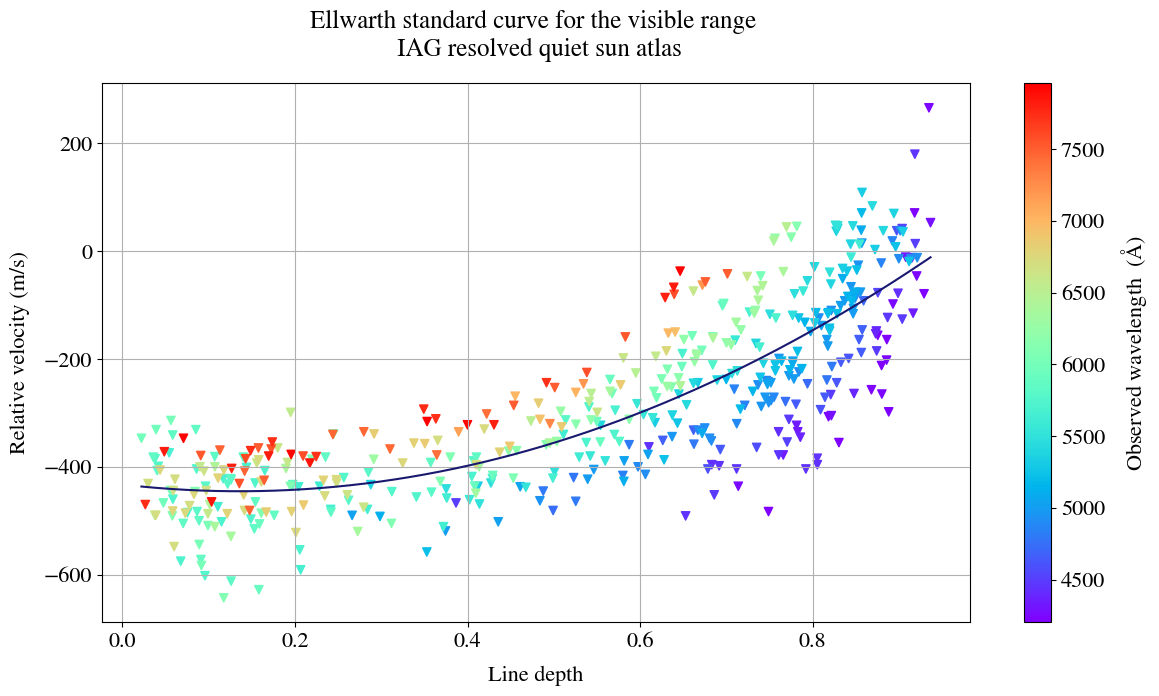

In [ ]:
#The graphic just want to compared the less scattered points

fig4, ax = plt.subplots(1,1,figsize=(14,7))

#Made a polynomial first order fit
param, cov = np.polyfit(SPA_data['Line Depth'],SPA_data['Velocity'], 2,cov=True)
values_fit = np.linspace(min(SPA_data['Line Depth']), max(SPA_data['Line Depth']), len(SPA_data['Line Depth']))
fit = np.polyval(param,values_fit)

scatter = ax.scatter(SPA_data['Line Depth'],SPA_data['Velocity'],c=SPA_data["Observed wavelength"],cmap='rainbow',lw=1,marker='v')
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label(r'Observed wavelength  $(\mathrm{\AA})$',labelpad=10)

ax.plot(values_fit,fit,color='midnightblue')

ax.set_title('Ellwarth standard curve for the visible range \n IAG resolved quiet sun atlas', pad=20)
ax.set_xlabel(r'Line depth',labelpad=10)
ax.set_ylabel(r'Relative velocity (m/s)',labelpad=10)
ax.grid()

# fig4.savefig('Standard curve_Ellwarth')


#### The deeper lines, coming from the spatially center of the sun, are affected by the differential rotation significantly than highest lines

## Wavelength-dependence of line depth for specific velocity

### Visible range

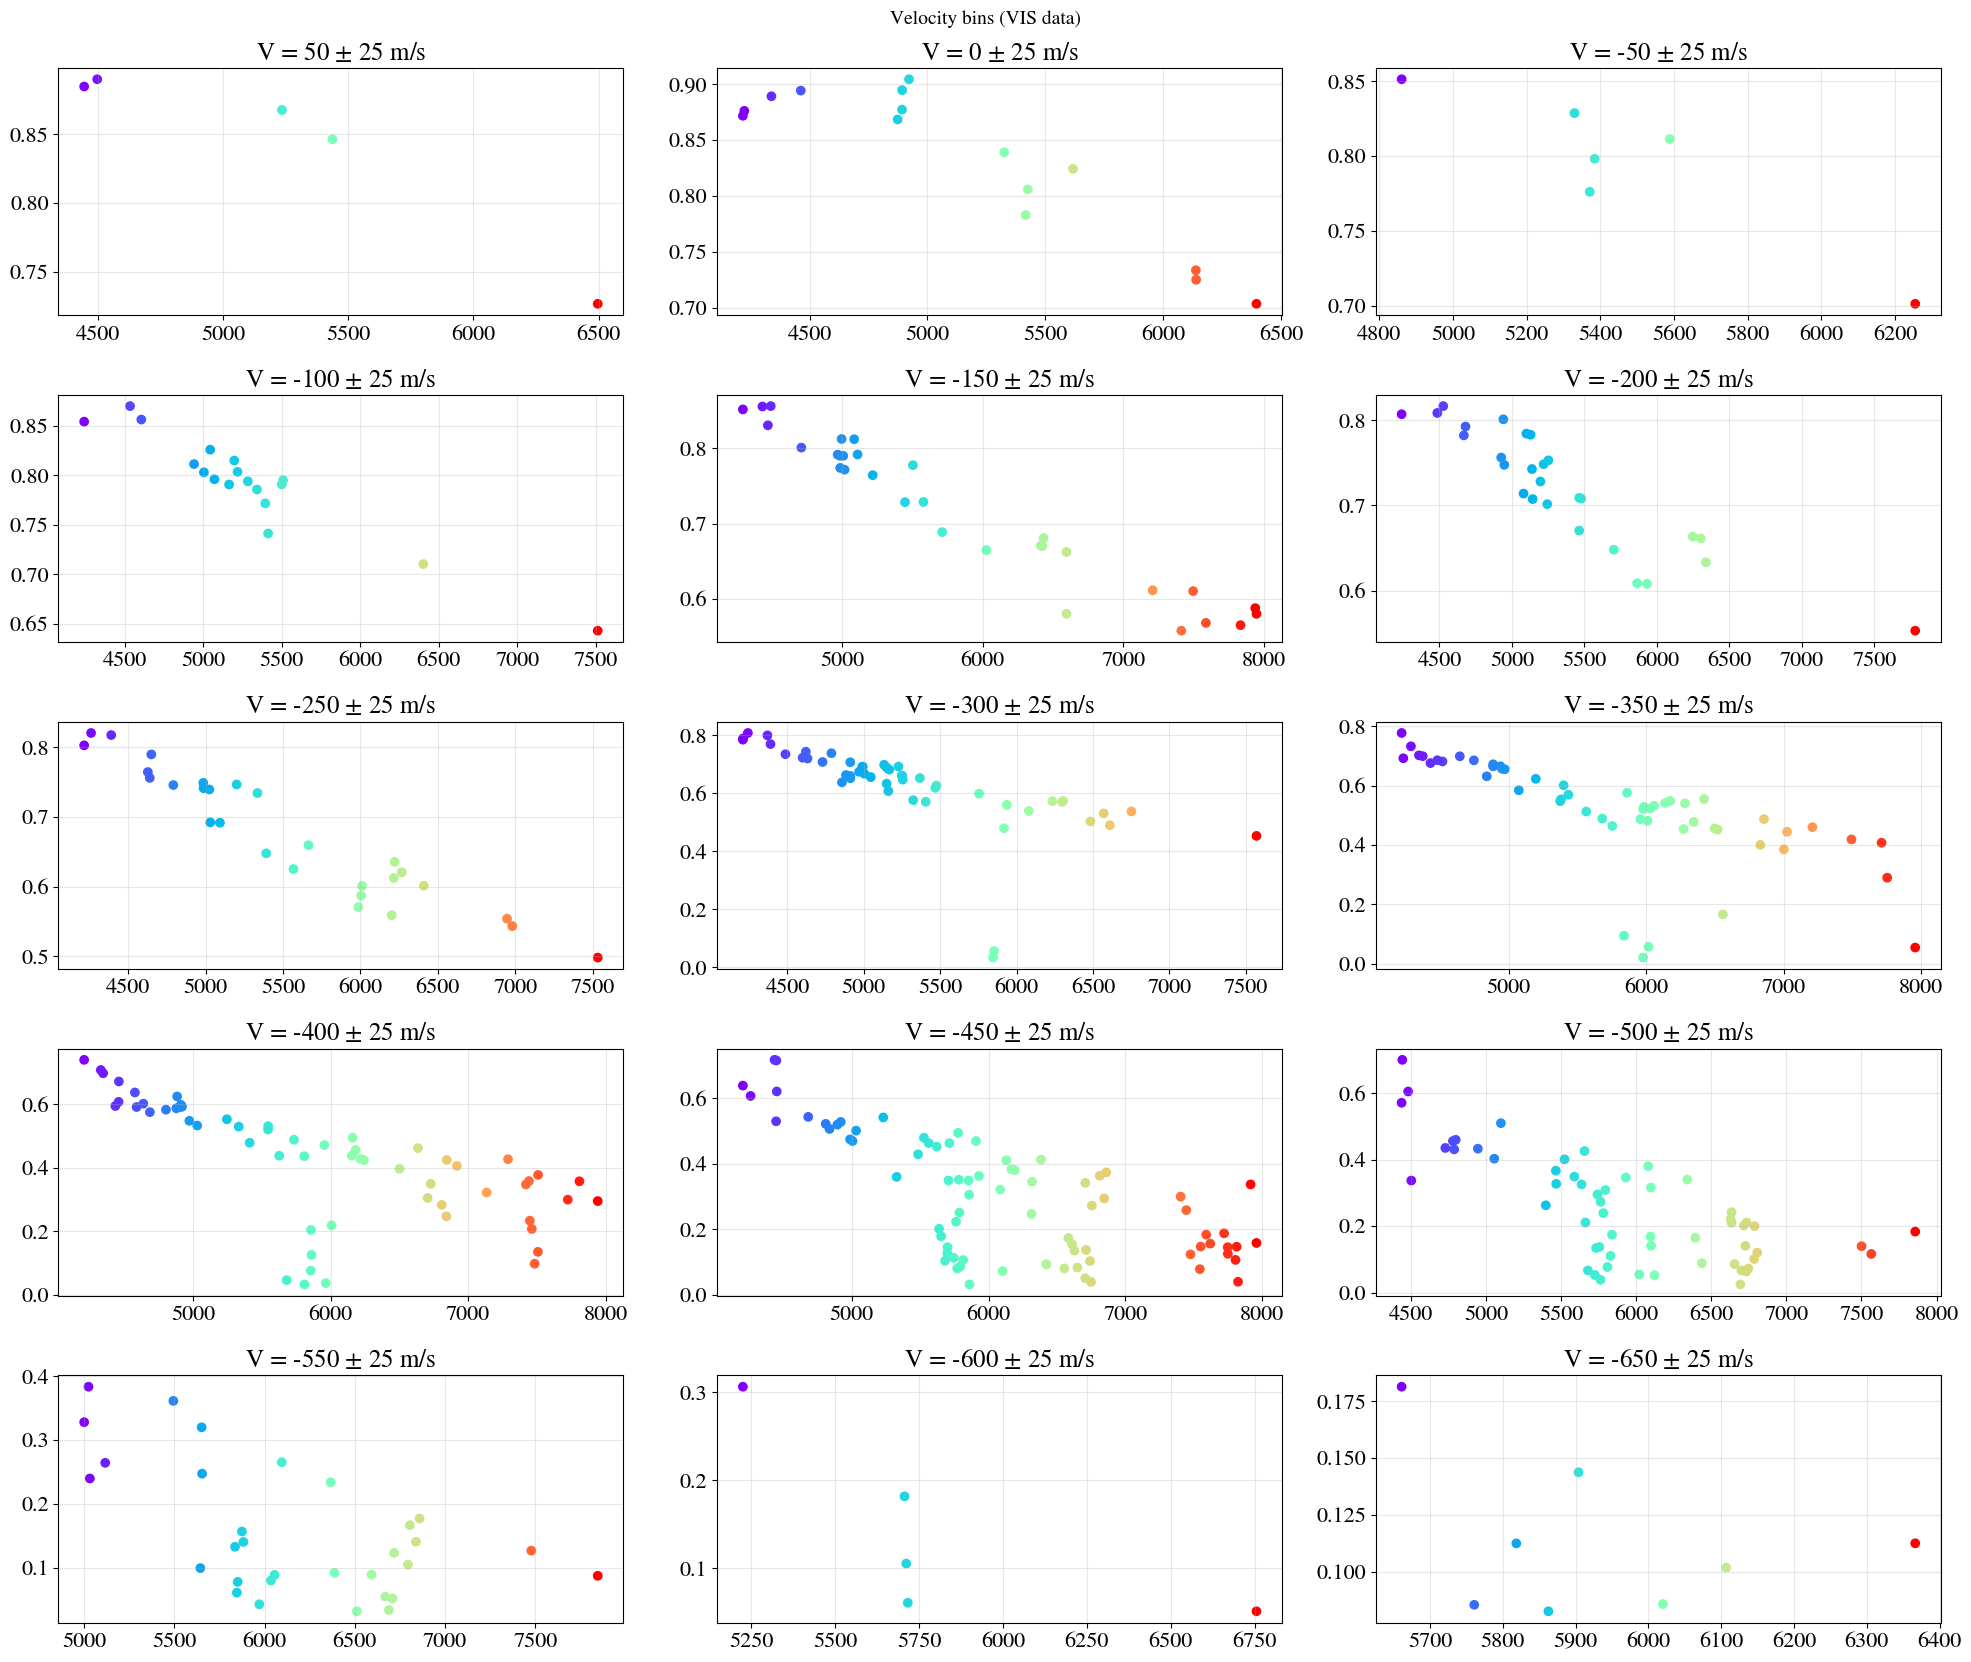

In [17]:
#Organize the dataframe wtih ascending velocities
VIS_listed = VIS_data.sort_values('Velocity', ascending=False, na_position='first').reset_index(drop=True)
velocity_VIS = []

#Make the markers like profesor Benjamin
markers = [50, 0,-50,-100,-150,-200,-250,-300,-350,-400,-450,-500,-550,-600,-650]

for each in markers:
    #Take the velocity bins of 50 m/s each one
    velocity_VIS.append(VIS_listed[VIS_listed['Velocity'].between(each-25, each+25, inclusive='neither')])

fig, axes = plt.subplots(5, 3, figsize=(20, 17))
fig.suptitle('Velocity bins (VIS data)',fontsize=14)
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < len(markers):
        ax.scatter(velocity_VIS[i]['Observed wavelength'],1-velocity_VIS[i]['Flux'],c=velocity_VIS[i]["Observed wavelength"],cmap='rainbow')
        ax.set_title(f'V = {markers[i]} $\pm$ 25 m/s')
        ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

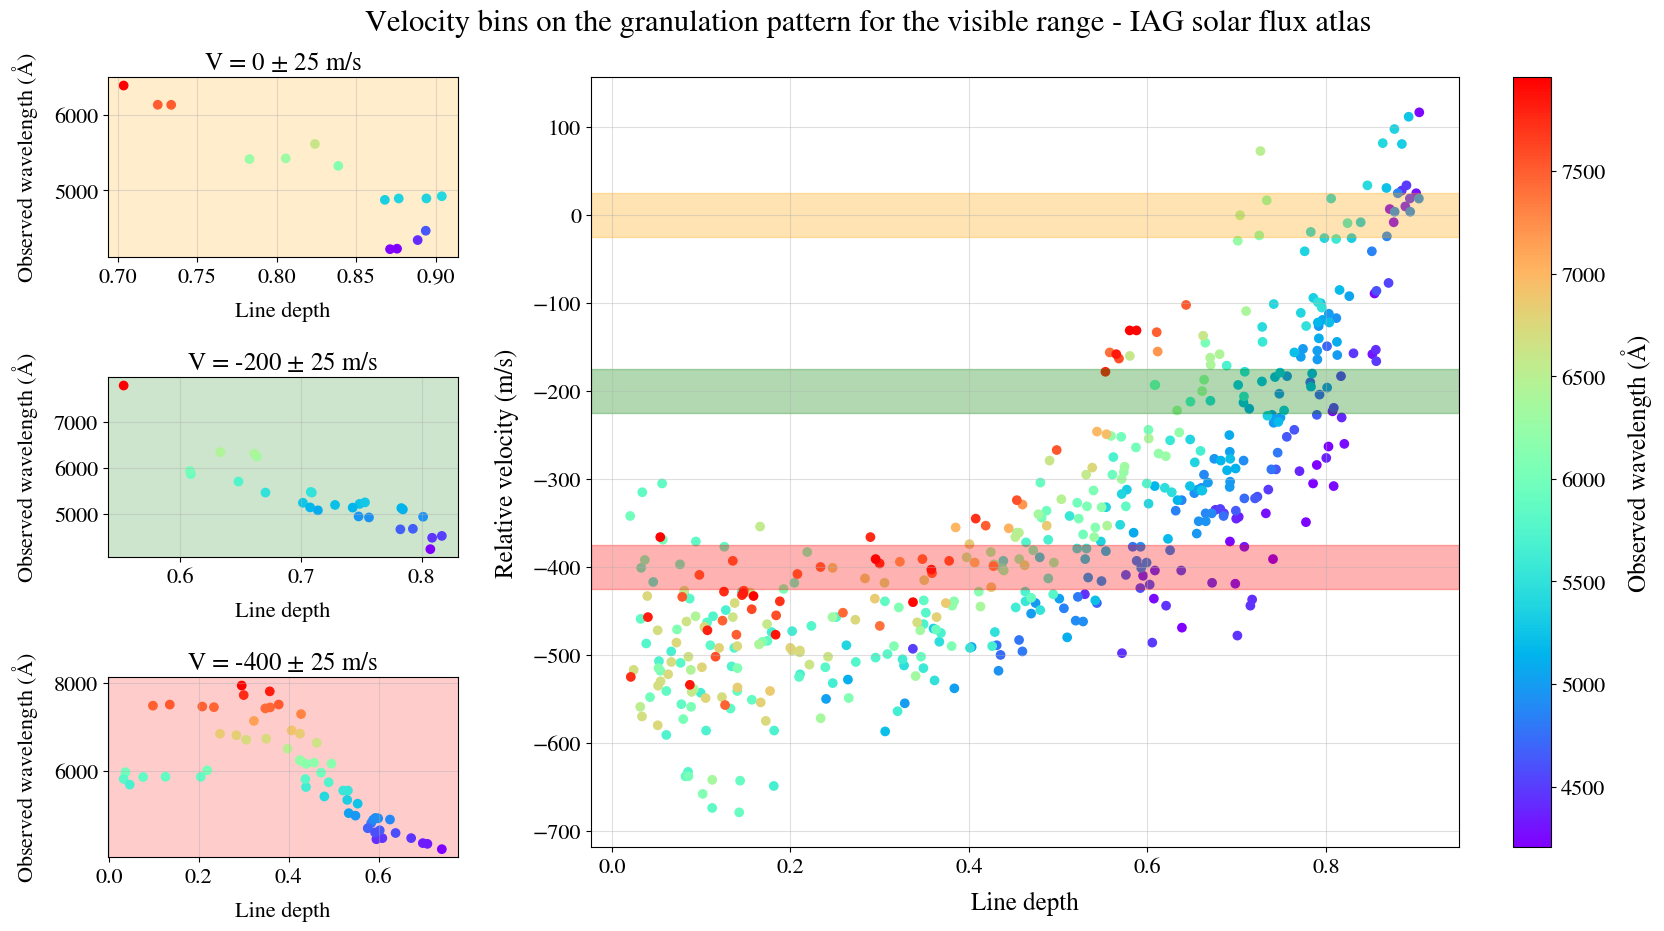

In [29]:
#Graph with the velocity bins remarked
fig, ax = plt.subplots(figsize=(14, 10))
scatter = ax.scatter(VIS_data['Line Depth'],VIS_data['Velocity'],c=VIS_data["Observed wavelength"],cmap='rainbow',lw=1,marker='o')

cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label(r'Observed wavelength $(\mathrm{\AA})$',labelpad=10,fontsize=18)

ax.set_title('Velocity bins on the granulation pattern for the visible range - IAG solar flux atlas',fontsize=22,x=0.32, y=1.05)
ax.set_xlabel(r'Line depth',labelpad=10,fontsize=18)
ax.set_ylabel(r'Relative velocity (m/s)',labelpad=10,fontsize=18)
ax.grid(alpha=0.4)

#Big figure with velocity bins
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

# Position and size [left, bottom, width, height]
ax_inseti = fig.add_axes([-0.22, 0.7, 0.25, 0.18])
ax_insetj = fig.add_axes([-0.22, 0.4, 0.25, 0.18])
ax_insetk = fig.add_axes([-0.22, 0.1, 0.25, 0.18])

# Graph the zoom
i=1
ax_inseti.scatter(velocity_VIS[i]['Line Depth'],velocity_VIS[i]['Observed wavelength'],c=velocity_VIS[i]["Observed wavelength"],cmap='rainbow')
ax_inseti.set_title(f'V = {markers[i]} $\pm$ 25 m/s')
ax_inseti.set_ylabel(r'Observed wavelength $(\mathrm{\AA})$',labelpad=10)
ax_inseti.set_xlabel(r'Line depth',labelpad=10)
ax_inseti.grid(alpha=0.4)

j=5
ax_insetj.scatter(velocity_VIS[j]['Line Depth'],velocity_VIS[j]['Observed wavelength'],c=velocity_VIS[j]["Observed wavelength"],cmap='rainbow')
ax_insetj.set_title(f'V = {markers[j]} $\pm$ 25 m/s')
ax_insetj.set_ylabel(r'Observed wavelength $(\mathrm{\AA})$',labelpad=10)
ax_insetj.set_xlabel(r'Line depth',labelpad=10)
ax_insetj.grid(alpha=0.4)

k=9
ax_insetk.scatter(velocity_VIS[k]['Line Depth'],velocity_VIS[k]['Observed wavelength'],c=velocity_VIS[k]["Observed wavelength"],cmap='rainbow')
ax_insetk.set_title(f'V = {markers[k]} $\pm$ 25 m/s')
ax_insetk.set_ylabel(r'Observed wavelength $(\mathrm{\AA})$',labelpad=10)
ax_insetk.set_xlabel(r'Line depth',labelpad=10)
ax_insetk.grid(alpha=0.4)


# Marcar la región del zoom en la gráfica principal
ax.axhspan(markers[i]-25, markers[i]+25, alpha=0.3, color='orange')
ax.axhspan(markers[j]-25, markers[j]+25, alpha=0.3, color='green')
ax.axhspan(markers[k]-25, markers[k]+25, alpha=0.3, color='red')

ax_inseti.set_facecolor(color=('orange', 0.2))
ax_insetj.set_facecolor(color=('green', 0.2))
ax_insetk.set_facecolor(color=('red', 0.2))

# fig.savefig('Velocity bins VIS_plot', bbox_inches='tight')

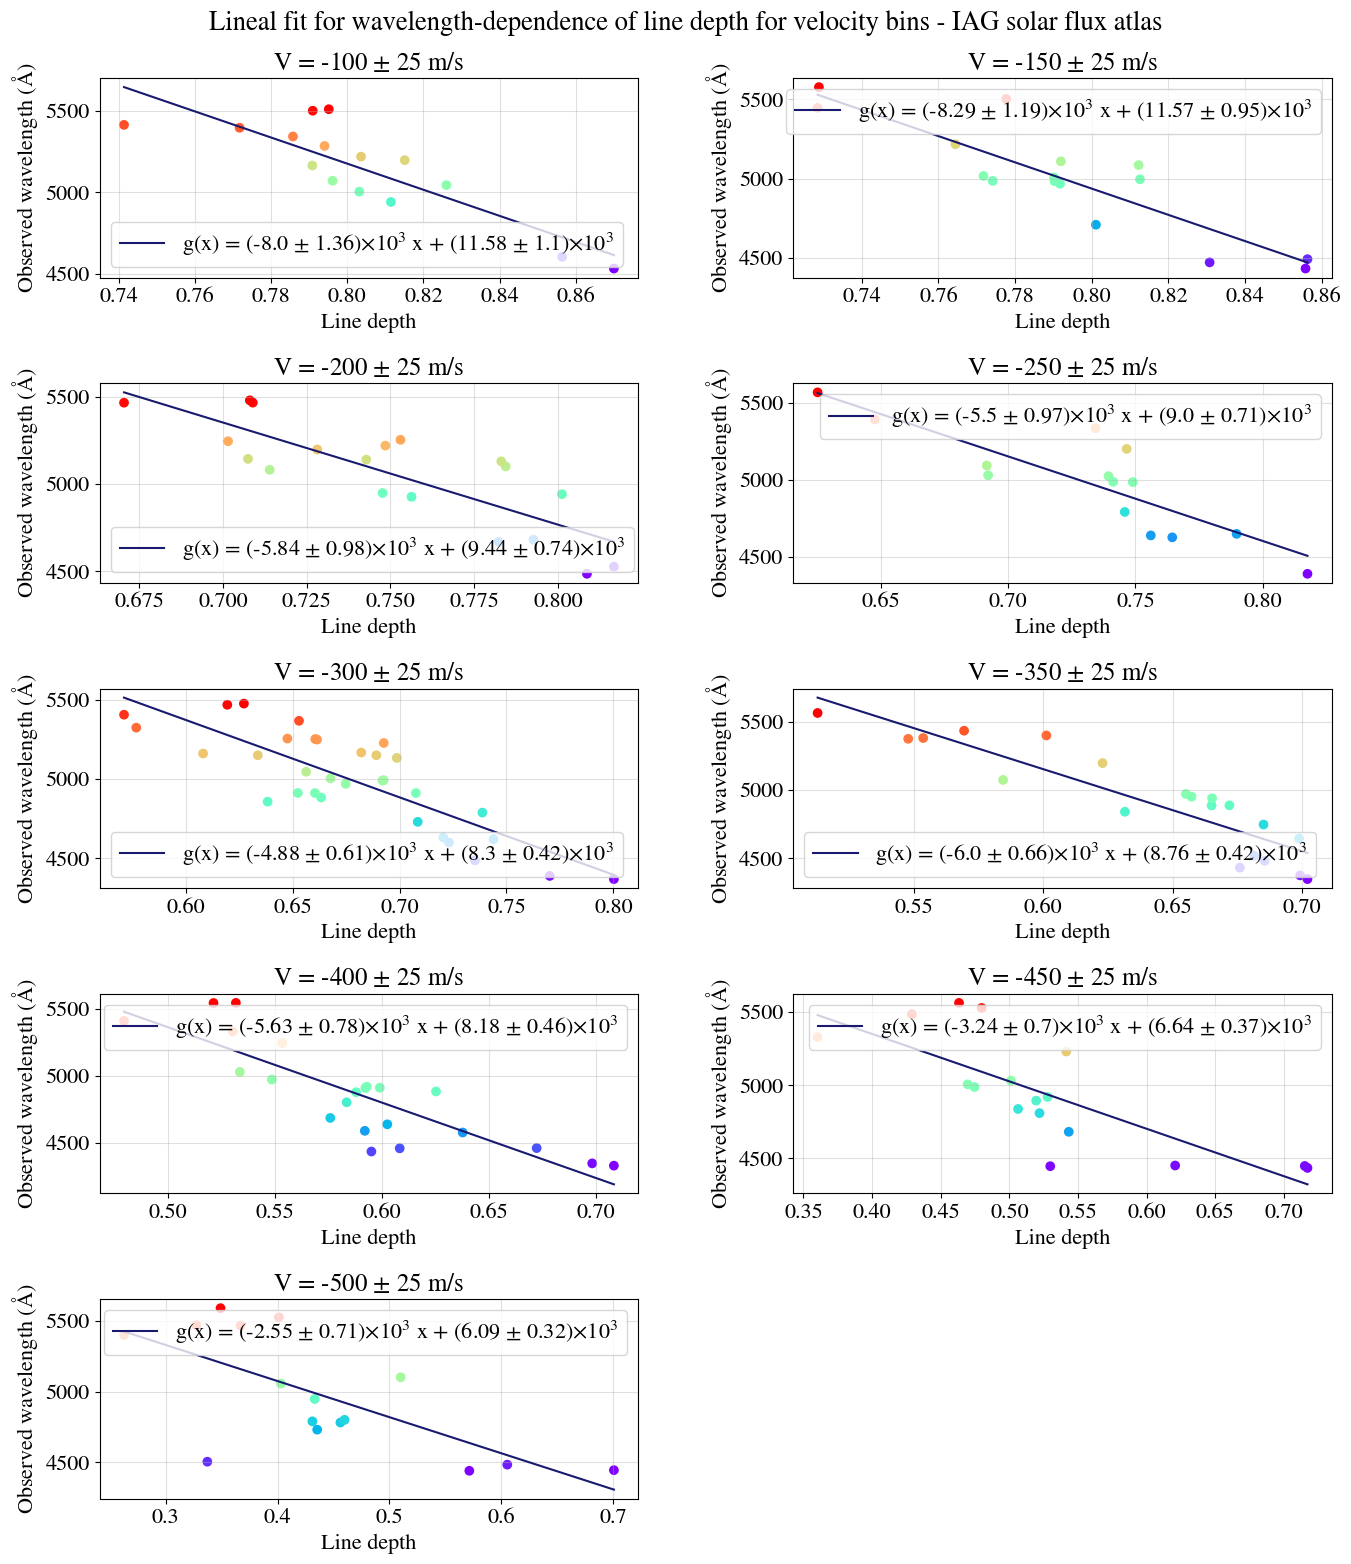

In [ ]:
#Just select the numerous one and have the range 4300 - 6000 A
fits_VIS = []
values_param_VIS = []
wave_VIS = []
cov_VIS = []
r_VIS = []

for i in range(3,12):
    #Reduce the scattered points to observe the values of slopes
    new_data = velocity_VIS[i][velocity_VIS[i]['Observed wavelength'].between(4300,5600, inclusive='neither')]

    #Made a polynomial first order fit
    param, cov = np.polyfit(new_data['Line Depth'],new_data['Observed wavelength'], 1,cov=True)
    values_fit = np.linspace(min(new_data['Line Depth']), max(new_data['Line Depth']), len(new_data['Line Depth']))
    fit = np.polyval(param,values_fit)
    # Standard error
    error = np.sqrt(np.diag(cov))
    #Calcule the pearson coeffcient where R2=r2
    r = new_data['Line Depth'].corr(pd.Series(fit, index=new_data.index))

    cov_VIS.append(pd.DataFrame(error))
    r_VIS.append(r**2)
    fits_VIS.append([values_fit,fit])
    values_param_VIS.append(pd.DataFrame(param))
    wave_VIS.append(new_data)

markers_new = markers[3:12]

#Parameters and their error
param_VIS = pd.concat(values_param_VIS,axis=1).T.reset_index(drop=True)
param_VIS.columns = ['Slope','Shift']
param_VIS['Error Slope'] = pd.concat(cov_VIS,axis=1).T.reset_index(drop=True)[0]
param_VIS['Error Shift'] = pd.concat(cov_VIS,axis=1).T.reset_index(drop=True)[1]

fig5, axes = plt.subplots(5, 2, figsize=(14, 16))
fig5.suptitle('Lineal fit for wavelength-dependence of line depth for velocity bins - IAG solar flux atlas')
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < len(fits_VIS):
        
        ax.scatter(wave_VIS[i]['Line Depth'],wave_VIS[i]['Observed wavelength'],c=wave_VIS[i]["Observed wavelength"],cmap='rainbow')
        ax.plot(fits_VIS[i][0],fits_VIS[i][1],color='midnightblue',
                label=rf'g(x) = ({round(param_VIS["Slope"].iloc[i]*1e-3,2)} $\pm$ {round(param_VIS["Error Slope"].iloc[i]*1e-3,2)})$\times 10^{{3}}$ x + ({round(param_VIS["Shift"].iloc[i]*1e-3,2)} $\pm$ {round(param_VIS["Error Shift"].iloc[i]*1e-3,2)})$\times 10^{{3}}$')
        ax.set_title(f'V = {markers_new[i]} $\pm$ 25 m/s')
        ax.set_xlabel(r'Line depth')
        ax.set_ylabel(r'Observed wavelength $(\mathrm{\AA})$')
        ax.grid(alpha=0.4)
        ax.legend()

    else:
        ax.set_visible(False)


plt.tight_layout()
# fig5.savefig('Velocity bins VIS')


In [35]:
param_VIS

,Slope,Shift,Error Slope,Error Shift
0,-8000.479046,11575.435321,1363.912490,1096.621088
1,-8290.327096,11568.815321,1191.408329,945.006137
2,-5843.070671,9441.408980,984.637001,739.888940
3,-5495.487105,8998.766455,966.868080,708.896589
4,-4878.507945,8299.279622,612.384398,415.797916
5,-6003.825633,8755.141471,662.994317,424.862121
6,-5634.497299,8180.149512,782.061204,463.045587
7,-3237.643330,6644.924761,701.417954,373.251181
8,-2551.359568,6094.265583,707.459692,321.103591


### Spatial data

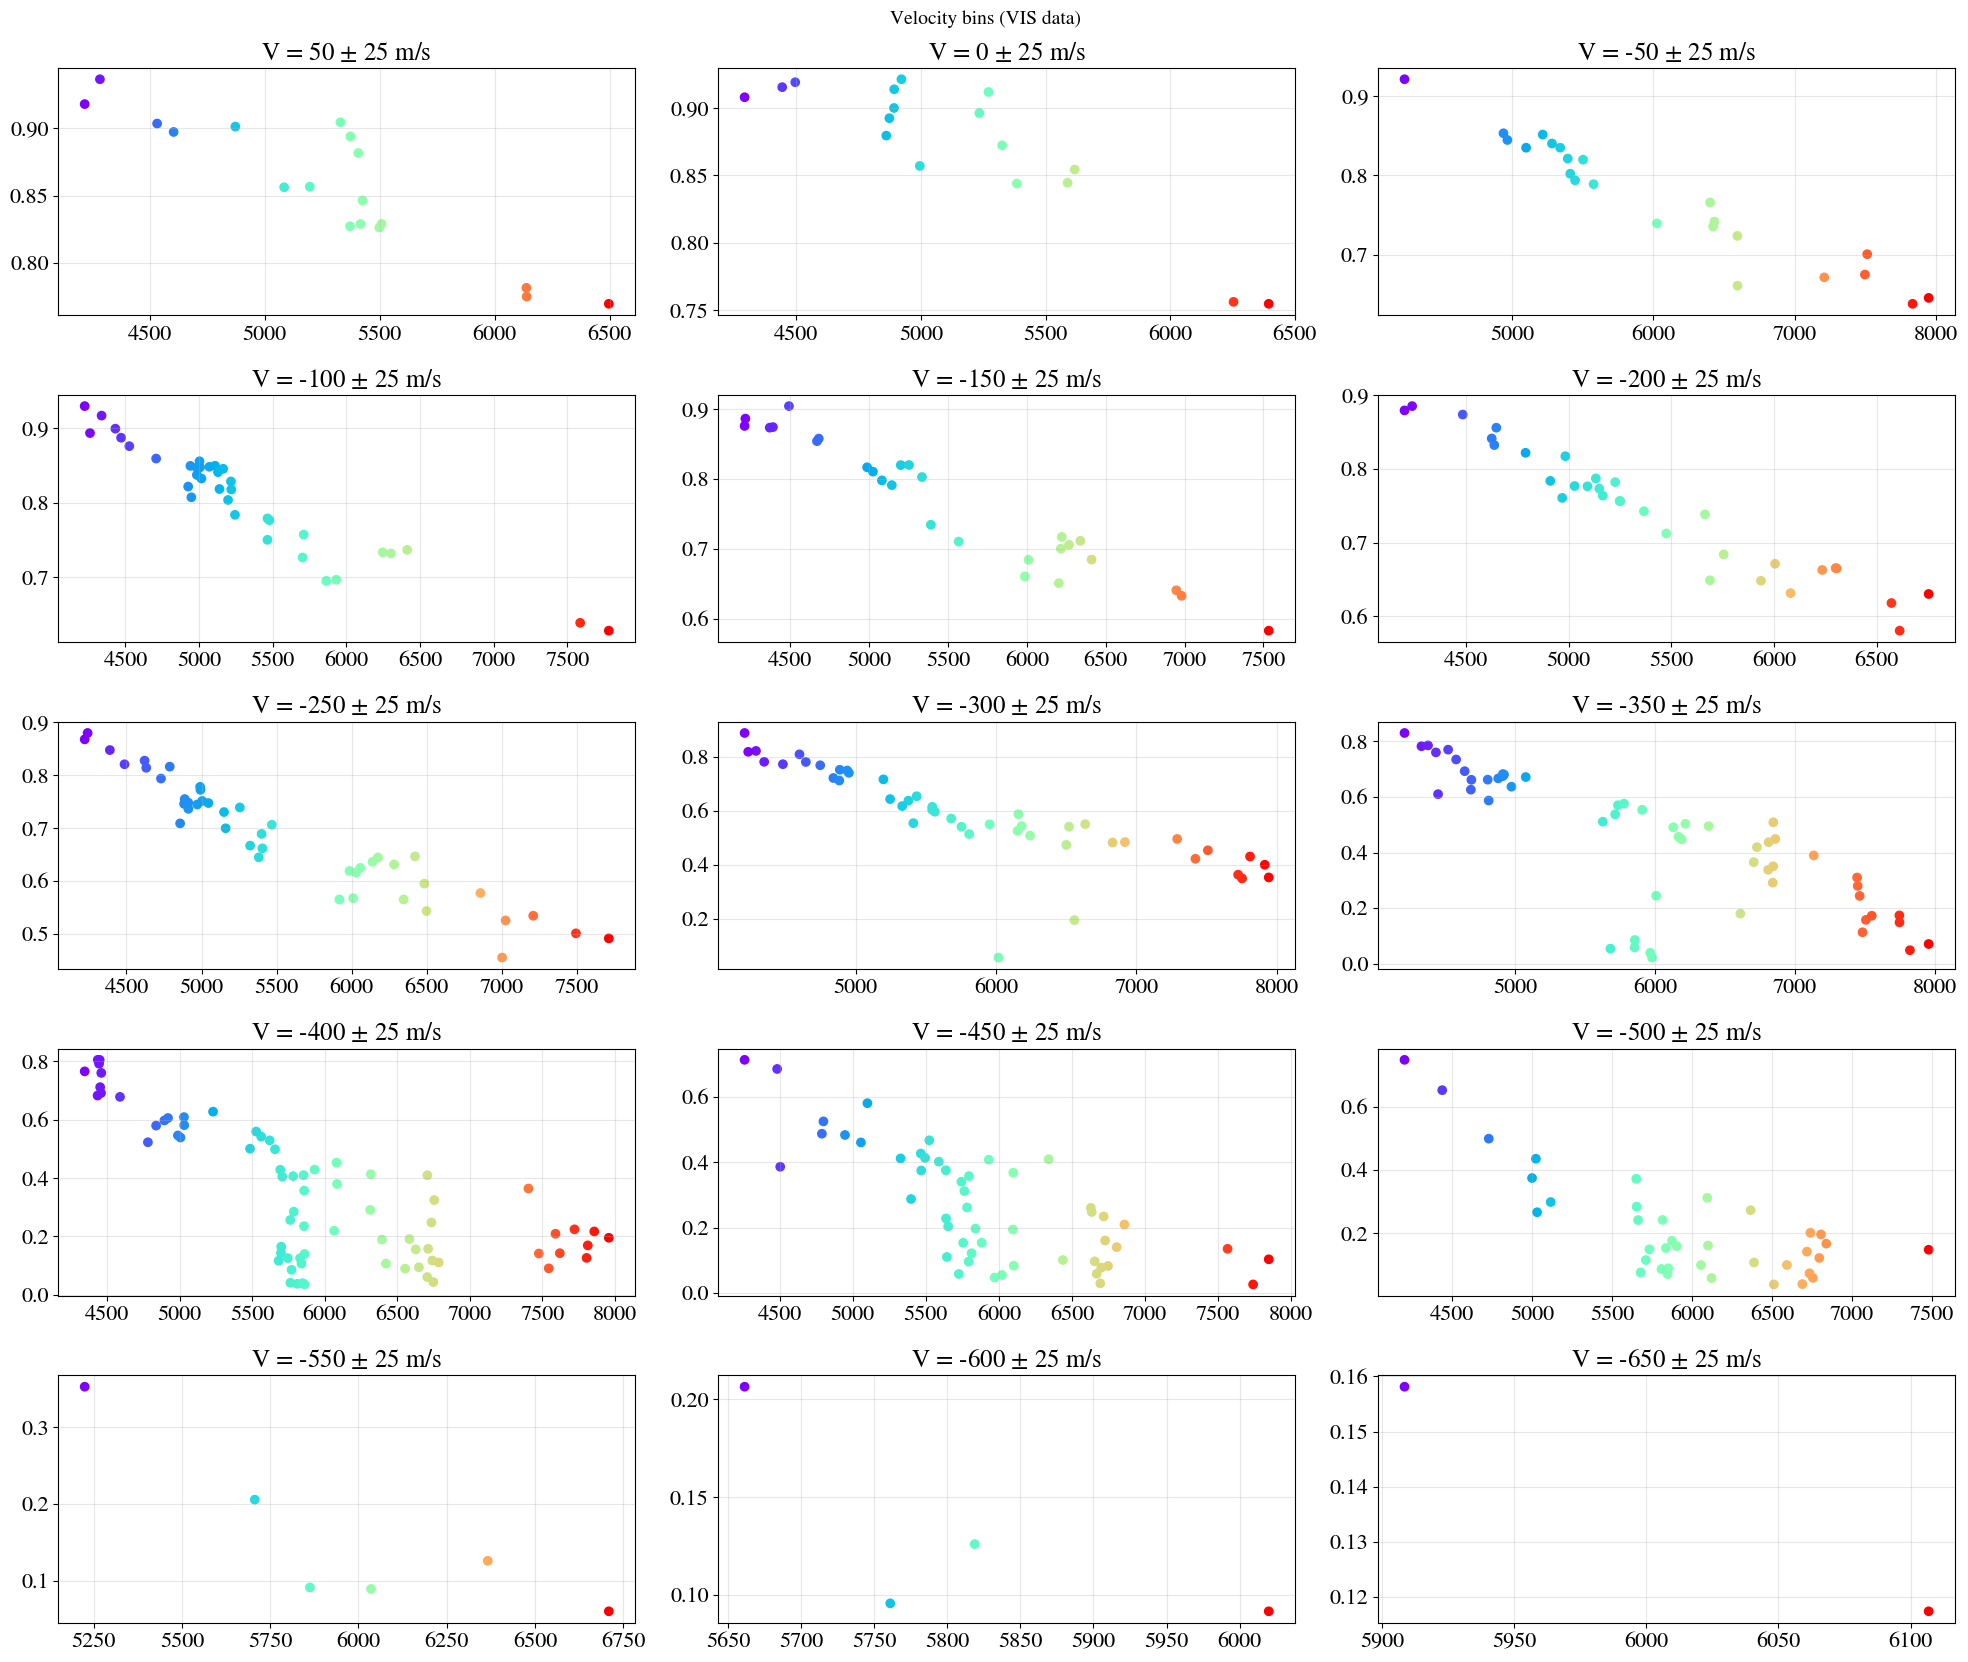

In [42]:
#Organize the dataframe wtih ascending velocities
SPA_listed = SPA_data.sort_values('Velocity', ascending=False, na_position='first').reset_index(drop=True)
velocity_SPA = []

#Make the markers like profesor Benjamin
markers = [50, 0,-50,-100,-150,-200,-250,-300,-350,-400,-450,-500,-550,-600,-650]

for each in markers:
    #Take the velocity bins of 50 m/s each one
    velocity_SPA.append(SPA_listed[SPA_listed['Velocity'].between(each-25, each+25, inclusive='neither')])

fig, axes = plt.subplots(5, 3, figsize=(20, 17))
fig.suptitle('Velocity bins (VIS data)',fontsize=14)
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < len(markers):
        ax.scatter(velocity_SPA[i]['Observed wavelength'],1-velocity_SPA[i]['Flux'],c=velocity_SPA[i]["Observed wavelength"],cmap='rainbow')
        ax.set_title(f'V = {markers[i]} $\pm$ 25 m/s')
        ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


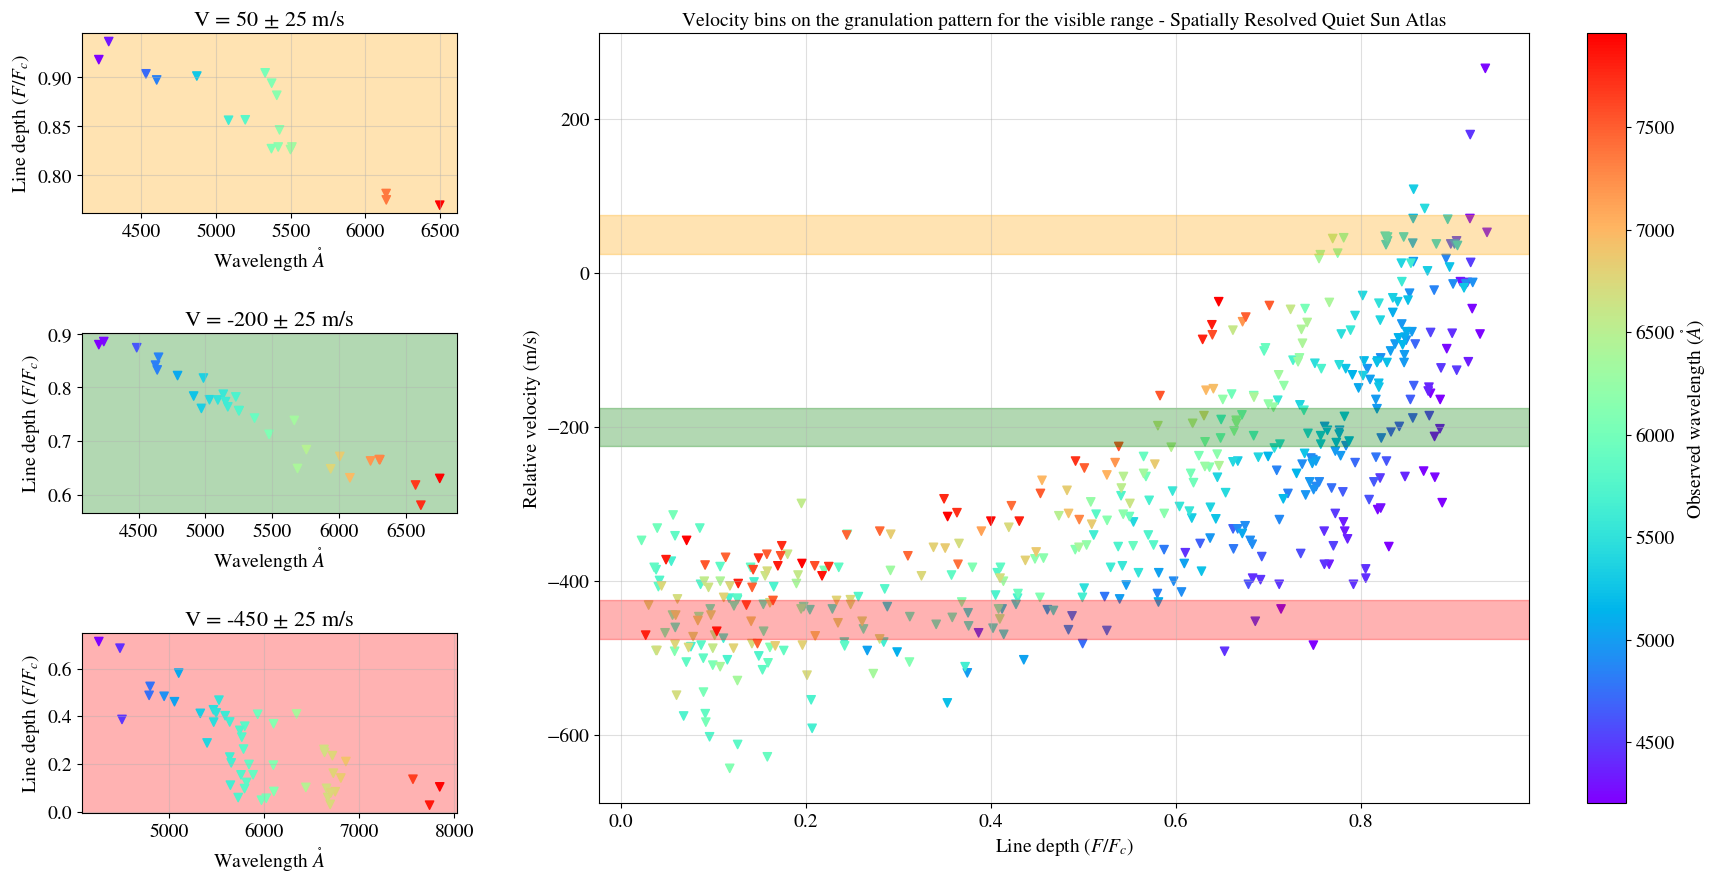

In [ ]:
#Another form to graph
# Crear figura principal
fig, ax = plt.subplots(figsize=(15, 10))
scatter = ax.scatter(SPA_data['Line Depth'],SPA_data['Velocity'],c=SPA_data["Observed wavelength"],cmap='rainbow',lw=1,marker='v')

cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label(r'Observed wavelength $(\mathring{A})$')

ax.set_title('Velocity bins on the granulation pattern for the visible range - Spatially Resolved Quiet Sun Atlas',fontsize=14)
ax.set_xlabel(r'Line depth $(F/F_{c})$')
ax.set_ylabel(r'Relative velocity (m/s)')
ax.grid(alpha=0.4)

# Crear gráfica insertada
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

# Definir posición y tamaño de la gráfica insertada [left, bottom, width, height]
ax_inseti = fig.add_axes([-0.22, 0.7, 0.25, 0.18])
ax_insetj = fig.add_axes([-0.22, 0.4, 0.25, 0.18])
ax_insetk = fig.add_axes([-0.22, 0.1, 0.25, 0.18])

# Graficar el zoom en la región de interés
i=0
ax_inseti.scatter(velocity_SPA[i]['Observed wavelength'],velocity_SPA[i]['Line Depth'],c=velocity_SPA[i]["Observed wavelength"],cmap='rainbow',marker='v')
ax_inseti.set_title(f'V = {markers[i]} $\pm$ 25 m/s')
ax_inseti.set_xlabel(r'Wavelength $\mathring{A}$')
ax_inseti.set_ylabel(r'Line depth $(F/F_{c})$')
ax_inseti.grid(alpha=0.4)

j=5
ax_insetj.scatter(velocity_SPA[j]['Observed wavelength'],velocity_SPA[j]['Line Depth'],c=velocity_SPA[j]["Observed wavelength"],cmap='rainbow',marker='v')
ax_insetj.set_title(f'V = {markers[j]} $\pm$ 25 m/s')
ax_insetj.set_xlabel(r'Wavelength $\mathring{A}$')
ax_insetj.set_ylabel(r'Line depth $(F/F_{c})$')
ax_insetj.grid(alpha=0.4)

k=10
ax_insetk.scatter(velocity_SPA[k]['Observed wavelength'],velocity_SPA[k]['Line Depth'],c=velocity_SPA[k]["Observed wavelength"],cmap='rainbow',marker='v')
ax_insetk.set_title(f'V = {markers[k]} $\pm$ 25 m/s')
ax_insetk.set_xlabel(r'Wavelength $\mathring{A}$')
ax_insetk.set_ylabel(r'Line depth $(F/F_{c})$')
ax_insetk.grid(alpha=0.4)


# Marcar la región del zoom en la gráfica principal
ax.axhspan(markers[i]-25, markers[i]+25, alpha=0.3, color='orange')
ax.axhspan(markers[j]-25, markers[j]+25, alpha=0.3, color='green')
ax.axhspan(markers[k]-25, markers[k]+25, alpha=0.3, color='red')

ax_inseti.set_facecolor(color=('orange', 0.3))
ax_insetj.set_facecolor(color=('green', 0.3))
ax_insetk.set_facecolor(color=('red', 0.3))


# fig.savefig('Velocity bins SPA_plot', bbox_inches='tight')

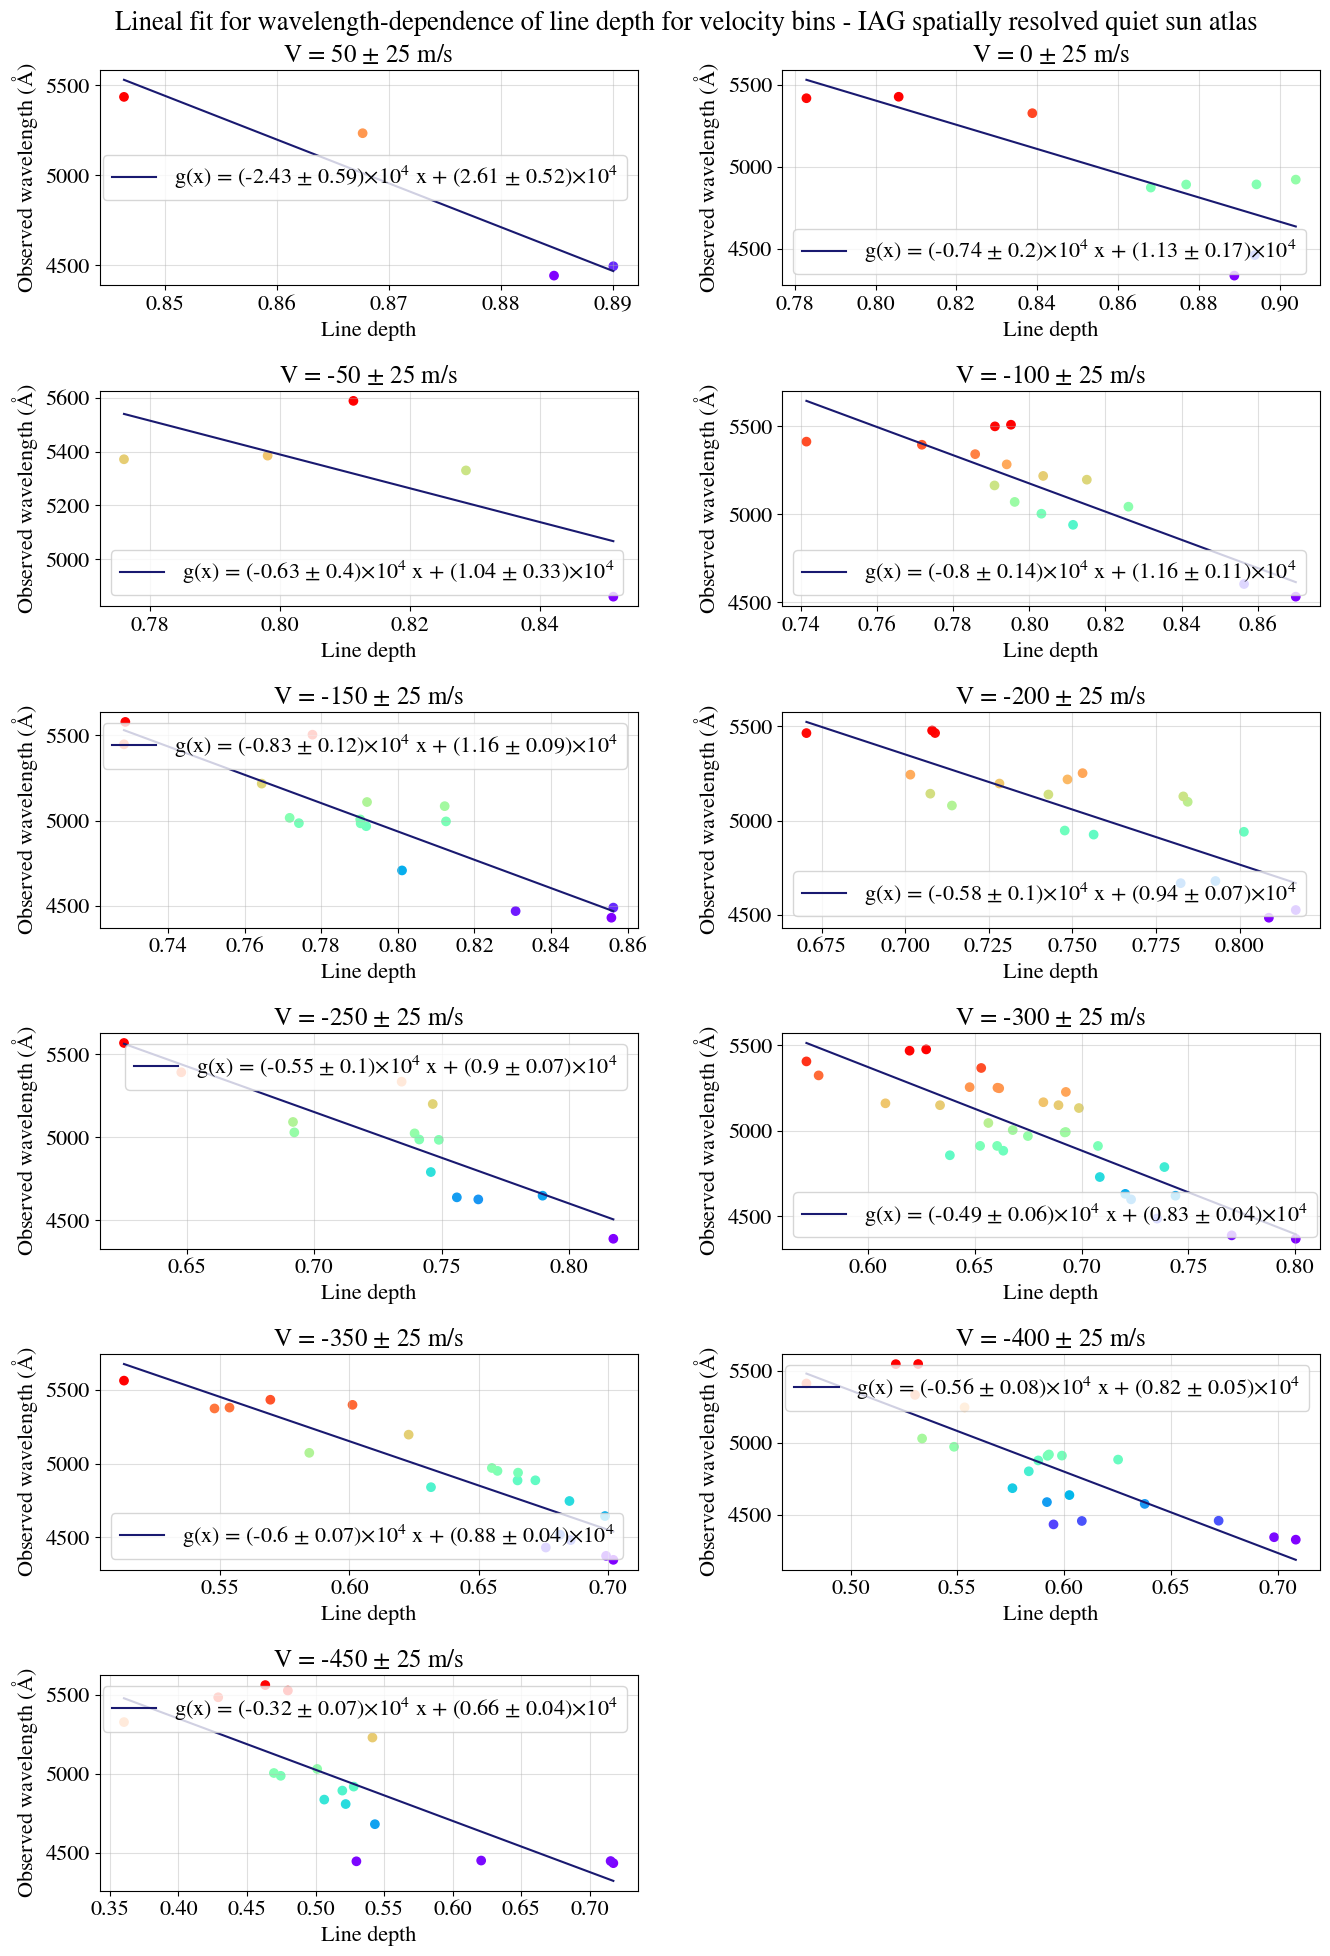

In [55]:
#Just select the numerous one and have the range 4300 - 6000 A
fits_SPA = []
values_param_SPA = []
wave_SPA = []
cov_SPA = []

for i in range(0,11):
    new_data = velocity_VIS[i][velocity_VIS[i]['Observed wavelength'].between(4300,5600, inclusive='neither')]

    #Made a polynomial first order fit
    param, cov = np.polyfit(new_data['Line Depth'],new_data['Observed wavelength'], 1,cov=True)
    values_fit = np.linspace(min(new_data['Line Depth']), max(new_data['Line Depth']), len(new_data['Line Depth']))
    fit = np.polyval(param,values_fit)
    # Standard error
    error = np.sqrt(np.diag(cov))
    #Calcule the pearson coeffcient where R2=r2
    r = new_data['Line Depth'].corr(pd.Series(fit, index=new_data.index))

    cov_SPA.append(pd.DataFrame(error))
    fits_SPA.append([values_fit,fit])
    values_param_SPA.append(pd.DataFrame(param))
    wave_SPA.append(new_data)

markers_new = markers[0:11]

#Parameters and their error
param_SPA = pd.concat(values_param_SPA,axis=1).T.reset_index(drop=True)
param_SPA.columns = ['Slope','Shift']
param_SPA['Error Slope'] = pd.concat(cov_SPA,axis=1).T.reset_index(drop=True)[0]
param_SPA['Error Shift'] = pd.concat(cov_SPA,axis=1).T.reset_index(drop=True)[1]

fig5, axes = plt.subplots(6, 2, figsize=(14, 20))
fig5.suptitle('Lineal fit for wavelength-dependence of line depth for velocity bins - IAG spatially resolved quiet sun atlas')
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < len(fits_SPA):
        
        ax.scatter(wave_SPA[i]['Line Depth'],wave_SPA[i]['Observed wavelength'],c=wave_SPA[i]["Observed wavelength"],cmap='rainbow')
        ax.plot(fits_SPA[i][0],fits_SPA[i][1],color='midnightblue',
                label=rf'g(x) = ({round(param_SPA["Slope"].iloc[i]*1e-4,2)} $\pm$ {round(param_SPA["Error Slope"].iloc[i]*1e-4,2)})$\times 10^{{4}}$ x + ({round(param_SPA["Shift"].iloc[i]*1e-4,2)} $\pm$ {round(param_SPA["Error Shift"].iloc[i]*1e-4,2)})$\times 10^{{4}}$')
        ax.set_title(f'V = {markers_new[i]} $\pm$ 25 m/s')
        ax.set_xlabel(r'Line depth')
        ax.set_ylabel(r'Observed wavelength $(\mathrm{\AA})$')
        ax.grid(alpha=0.4)
        ax.legend()

    else:
        ax.set_visible(False)

fig5.tight_layout()
plt.show()

# fig5.savefig('Velocity bins SPA')

In [56]:
param_SPA

,Slope,Shift,Error Slope,Error Shift
0,-24285.845974,26084.508448,5943.977937,5185.312629
1,-7365.812406,11295.357732,1992.086196,1718.010755
2,-6279.024998,10412.659255,4000.851440,3254.732432
3,-8000.479046,11575.435321,1363.912490,1096.621088
4,-8290.327096,11568.815321,1191.408329,945.006137
5,-5843.070671,9441.408980,984.637001,739.888940
6,-5495.487105,8998.766455,966.868080,708.896589
7,-4878.507945,8299.279622,612.384398,415.797916
8,-6003.825633,8755.141471,662.994317,424.862121
9,-5634.497299,8180.149512,782.061204,463.045587


The rotation is not the reason of chromodependence, when we observe the center disk spectrum and measure the rotation is greater than the full disk integrated atlas.